# Linear regression analysis
Exploring the linearity of the Community Standard dilution experiment. Testing out linear models.

### Imports

In [43]:
import json
import numpy as np
import plotly
import plotly.graph_objects as go
from scipy.stats import linregress
import itertools

In [44]:
def generate_fig(value_dict_left, value_dict_right=None, left_norm=True, right_norm=True):
    if value_dict_right is None:
        value_dict_right = value_dict_left.copy()
    if left_norm:
        slope_left = "slope_norm"
        rval_left = "r_value_norm"
        reads_left = "reads_norm_log"
        fitvals_x_left = "fit_vals_norm_x"
        fitvals_y_left = "fit_vals_norm_y"
        x_title_left = 'log(IC Normalized Reads)'
    else:
        slope_left = "slope"
        rval_left = "r_value"
        reads_left = "reads_log"
        fitvals_x_left = "fit_vals_x"
        fitvals_y_left = "fit_vals_y"
        x_title_left = 'log(Reads)'
    if right_norm:
        slope_right = "slope_norm"
        rval_right = "r_value_norm"
        reads_right = "reads_norm_log"
        fitvals_x_right = "fit_vals_norm_x"
        fitvals_y_right = "fit_vals_norm_y"
        x_title_right = 'IC Normalized Read Count'
    else:
        slope_right = "slope"
        rval_right = "r_value"
        reads_right = "reads_log"
        fitvals_x_right = "fit_vals_x"
        fitvals_y_right = "fit_vals_y"
        x_title_right = 'Read Count'
    colors = [
        '#1f77b4',
        '#ff7f0e',
        '#2ca02c',
        '#d62728',
        '#9467bd',
        '#8c564b',
        '#e377c2',
        '#7f7f7f',
        '#bcbd22',
        '#17becf'
    ]
    data = []
    annotations = []
    slope_left_ls = []
    slope_right_ls = []
    r2_left_ls = []
    r2_right_ls = []
    for idx, org in enumerate(value_dict_left.keys()):
        org_dict_left = value_dict_left[org]
        slope_left_ls.append(org_dict_left[slope_left])
        r2_left_ls.append(org_dict_left[rval_left])
        trace_scatter_left = go.Scatter(
            x=org_dict_left[reads_left],
            y=org_dict_left["conc_nonzero"],
            mode='markers',
            name=orgs[org],
            marker=dict(
                color=colors[idx]
            ),
            xaxis='x1',
            yaxis='y1',
            legendgroup=idx
        )
        trace_fit_left = go.Scatter(
            x=org_dict_left[fitvals_x_left],
            y=org_dict_left[fitvals_y_left],
            mode='lines',
            line=dict(
                color=colors[idx]
            ),
            showlegend=False,
            name=orgs[org],
            xaxis='x1',
            yaxis='y1',
            legendgroup=idx
        )
        data.extend([trace_scatter_left, trace_fit_left])
    for idx, org in enumerate(value_dict_right.keys()):
        org_dict_right = value_dict_right[org]
        slope_right_ls.append(org_dict_right[slope_right])
        r2_right_ls.append(org_dict_right[rval_right])
        trace_scatter_right = go.Scatter(
            x=org_dict_right[reads_right],
            y=org_dict_right["conc_nonzero"],
            mode='markers',
            showlegend=False,
            name=orgs[org],
            marker=dict(
                color=colors[idx]
            ),
            xaxis='x2',
            yaxis='y2',
            legendgroup=idx
        )
        trace_fit_right = go.Scatter(
            x=org_dict_right[fitvals_x_right],
            y=org_dict_right[fitvals_y_right],
            mode='lines',
            line=dict(
                color=colors[idx]
            ),
            showlegend=False,
            name=orgs[org],
            xaxis='x2',
            yaxis='y2',
            legendgroup=idx
        )
        data.extend([trace_scatter_right, trace_fit_right])
    annotations.extend([
        dict(
            x=np.max([np.max(value_dict_left[key][reads_left]) for key in value_dict_left]),
            y=3,
            xref='x1',
            yref='y1',
            text=f'Mean slope: {np.mean(slope_left_ls):0.2f}+/-{np.max(slope_left_ls) - np.min(slope_left_ls) / 2:0.2f}<br>Mean R<sup>2</sup>: {np.mean(r2_left_ls)**2:0.2f}',
            showarrow=False,
            font=dict(
                size=12,
            )
        ),
        dict(
            x=np.max([np.max(value_dict_right[key][reads_right]) for key in value_dict_right]),
            y=3,
            xref='x2',
            yref='y2',
            text=f'Mean slope: {np.mean(slope_right_ls):0.2f} +/- {(np.max(slope_right_ls) - np.min(slope_right_ls)) / 2:0.2f}<br>Mean R<sup>2</sup>: {np.median(r2_right_ls)**2:0.2f}',
            showarrow=False,
            font=dict(
                size=12,
            )
        )
    ])
    layout = go.Layout(
        height=700,
        annotations = annotations,
        yaxis=dict(
            title='Organism Copy Number',
            anchor='x1'
        ),
        yaxis2=dict(
            title='Organism Copy Number',

            anchor='x2'
        ),
        xaxis=dict(
            title=x_title_left,
            domain=[0, 0.45],
            anchor='y1'
        ),
        xaxis2=dict(
            title=x_title_right,
            domain=[0.55, 1],
            anchor='y2'
        )
    )
    fig = go.Figure(data, layout)
    return fig


def generate_single_fig(value_dict):
    colors = [
        '#1f77b4',
        '#ff7f0e',
        '#2ca02c',
        '#d62728',
        '#9467bd',
        '#8c564b',
        '#e377c2',
        '#7f7f7f',
        '#bcbd22',
        '#17becf'
    ]
    data = []
    annotations = []
    slope_ls = []
    slope_ls = []
    r2_ls = []
    r2_ls = []
    for idx, org in enumerate(value_dict.keys()):
        org_dict = value_dict[org]
        slope_ls.append(org_dict["slope_norm"])
        r2_ls.append(org_dict["r_value_norm"])
        trace_scatter = go.Scatter(
            x=org_dict["reads_norm_log"],
            y=org_dict["conc_nonzero"],
            mode='markers',
            name=orgs[org],
            marker=dict(
                color=colors[idx]
            ),
            legendgroup=idx
        )
        trace_fit = go.Scatter(
            x=org_dict["fit_vals_norm_x"],
            y=org_dict["fit_vals_norm_y"],
            mode='lines',
            line=dict(
                color=colors[idx]
            ),
            showlegend=False,
            name=orgs[org],
            legendgroup=idx
        )
        data.extend([trace_scatter, trace_fit])
    annotations.extend([
        dict(
            x=3,
            y=np.max([np.max(value_dict[key]["conc_nonzero"]) for key in value_dict]),
            text=f'Mean slope: {np.mean(slope_ls):0.2f}+/-{np.max(slope_ls) - np.min(slope_ls) / 2:0.2f}<br>Mean R<sup>2</sup>: {np.mean(r2_ls)**2:0.2f}',
            showarrow=False,
            font=dict(
                size=12,
            )
        )
    ])
    layout = go.Layout(
        annotations = annotations,
        xaxis=dict(
            title='log(IC Normalized Reads)'
        ),
        yaxis=dict(
            title='log(Concentration)'
        )
    )
    fig = go.Figure(data, layout)
    return fig


def generate_single_trace_set(value_dict):
    colors = [
        '#1f77b4',
        '#ff7f0e',
        '#2ca02c',
        '#d62728',
        '#9467bd',
        '#8c564b',
        '#e377c2',
        '#7f7f7f',
        '#bcbd22',
        '#17becf'
    ]
    data = []
    annotations = []
    slope_ls = []
    slope_ls = []
    r2_ls = []
    r2_ls = []
    for idx, org in enumerate(value_dict.keys()):
        org_dict = value_dict[org]
        slope_ls.append(org_dict["slope_norm"])
        r2_ls.append(org_dict["r_value_norm"])
        trace_scatter = go.Scatter(
            x=org_dict["reads_norm_log"],
            y=org_dict["conc_nonzero"],
            mode='markers',
            name=orgs[org],
            marker=dict(
                color=colors[idx]
            ),
            legendgroup=idx
        )
        trace_fit = go.Scatter(
            x=org_dict["fit_vals_norm_x"],
            y=org_dict["fit_vals_norm_y"],
            mode='lines',
            line=dict(
                color=colors[idx]
            ),
            showlegend=False,
            name=orgs[org],
            legendgroup=idx
        )
        data.extend([trace_scatter, trace_fit])
    return data


def filter_data(count_dict, adjust_copy_number=True):
    out_dict = {}
    for org in count_dict.keys():
        org_dict = count_dict[str(org)]
        conc = np.array(org_dict["Concentration"])
        reads, ctrls = org_dict['Read Counts'], org_dict['Ctrl Counts']
        if org in copy_numbers and adjust_copy_number:
            copy_number_normalizer = copy_numbers[org]['copies']
        else:
            copy_number_normalizer = 1
        reads = np.array(reads) / copy_number_normalizer
        reads_nonzero_idx = np.argwhere(reads > 0).reshape(-1)
        reads_nonzero = reads[reads_nonzero_idx]
        ctrls_nonzero = np.array(ctrls)[reads_nonzero_idx]
        conc_nonzero = conc[reads_nonzero_idx]
        reads_log = np.log10(reads_nonzero)
        slope, intercept, r_value, p_value, std_err = linregress(reads_log, conc_nonzero)
        fit_vals_y = slope * reads_log + intercept
        fit_vals_x = reads_log
        # Normalized
        reads_norm = reads_nonzero / ctrls_nonzero
        reads_norm_log = np.log10(reads_norm)
        slope_norm, intercept_norm, r_value_norm, p_value_norm, std_err_norm = \
            linregress(reads_norm_log, conc_nonzero)
        fit_vals_norm_y = slope_norm * reads_norm_log + intercept_norm
        fit_vals_norm_x = reads_norm_log
        filtered_dict = {
            "conc_nonzero": conc_nonzero,
            "reads_log": reads_log,
            "reads_norm_log": reads_norm_log,
            "slope": slope,
            "fit_vals_y": fit_vals_y,
            "fit_vals_x": fit_vals_x,
            "slope_norm": slope_norm,
            "fit_vals_norm_y": fit_vals_norm_y,
            "fit_vals_norm_x": fit_vals_norm_x,
            "r_value": r_value,
            "r_value_norm": r_value_norm,
            "std_err": std_err,
            "std_err_norm": std_err_norm,
            "ctrls_nonzero": ctrls_nonzero
        }
        out_dict.update({org: filtered_dict})
    return out_dict

### Data

In [45]:
with open('data/community_std_counts/community_std_counts_16s_a.json') as a_file:
    a = json.load(a_file)
with open('data/community_std_counts/community_std_counts_16s_b.json') as b_file:
    b = json.load(b_file)
with open('data/community_std_counts/community_std_counts_16s_c.json') as c_file:
    c = json.load(c_file)
with open('data/community_std_counts/community_std_counts_16s_d.json') as d_file:
    d = json.load(d_file)
with open('data/community_standard_panel.json') as orgs_file:
    orgs = json.load(orgs_file)
with open('./data/rrndb_16s_copies.json') as copies_file:
    copy_numbers = json.load(copies_file)

### Panel Organisms
#### Gram negative (3)
Pseudomonas aeruginosa <br>
Escherichia coli <br>
Salmonella enterica <br>

#### Gram positive (5)
Lactobacillus fermentum <br>
Enterococcus faecalis <br>
Staphylococcus aureus <br>
Listeria Monocytogenes <br>
Bacillus subtilis <br>

#### Fungus (2)
Saccharomyces cerevisiae <br>
Cryptococcus neoformans

### Effect of normalizing

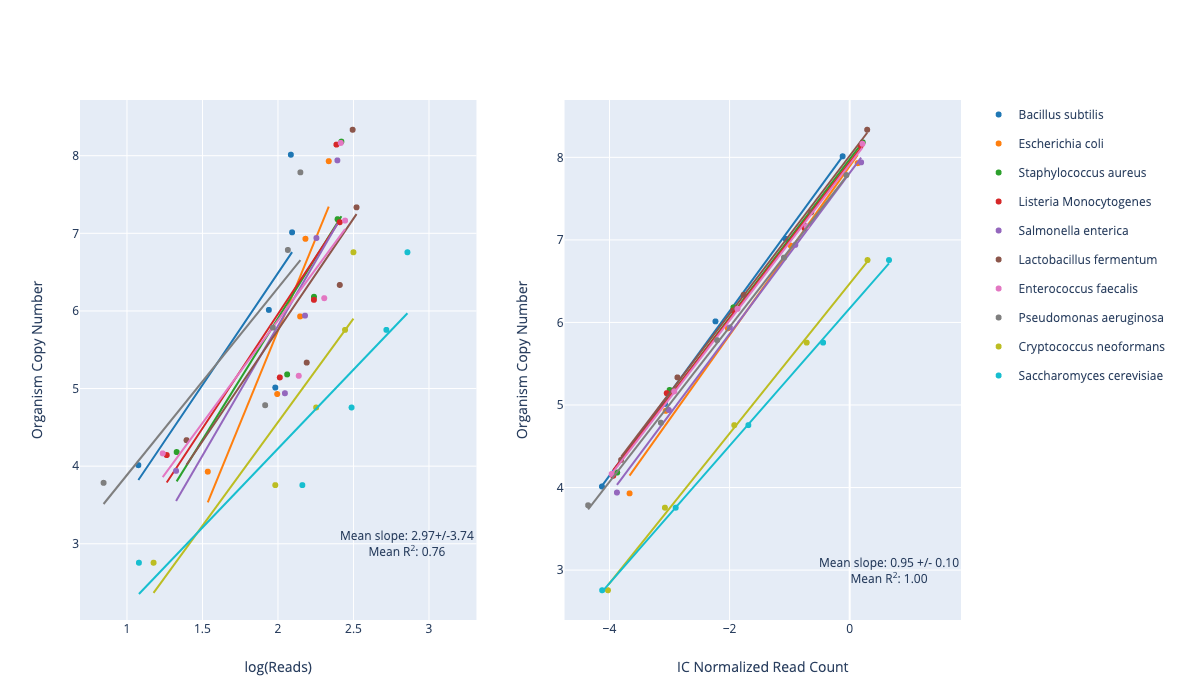

In [46]:
count_dict_b = filter_data(b)
fig = generate_fig(count_dict_b, left_norm=False)
fig.show()

### Effect of adjusting for copy number
There is no adjustment for 18S available here. The fungal targets will be removed.

In [32]:
for count_dict in [a, b, c, d]:
    count_dict.pop("4932")
    count_dict.pop("5207")

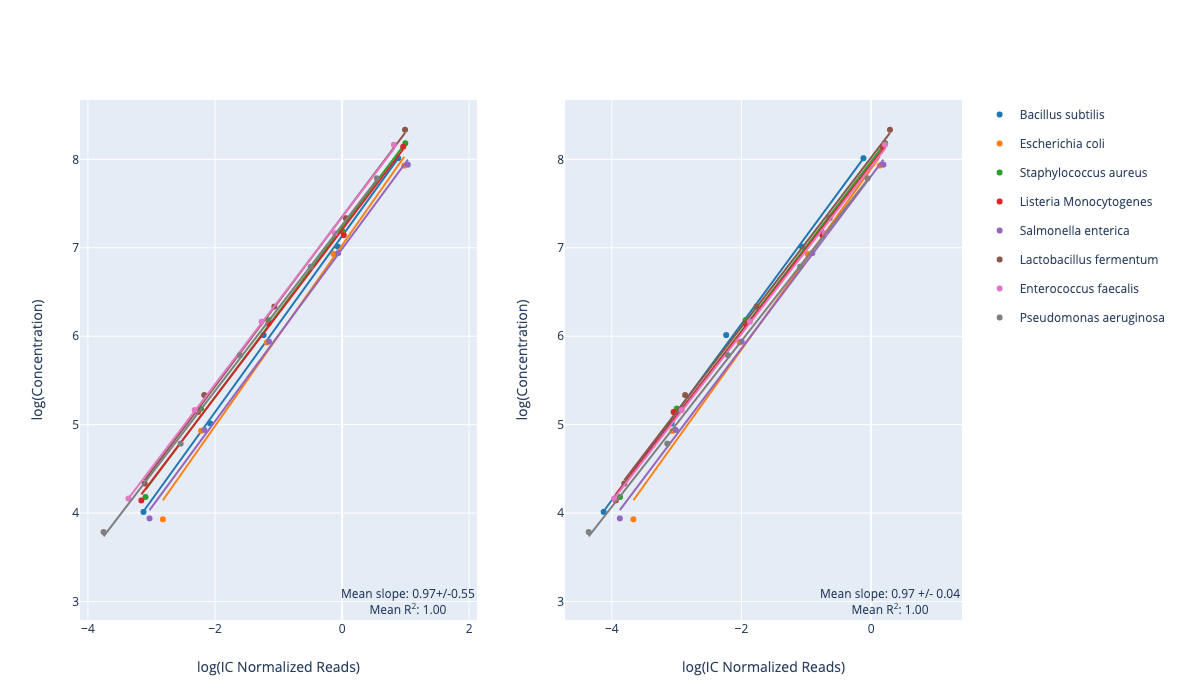

In [33]:
count_dict_b = filter_data(b)
count_dict_b_not_norm = filter_data(b, adjust_copy_number=False)
fig = generate_fig(count_dict_b_not_norm, value_dict_right=count_dict_b)
fig.show()

### Background cell concentration

In [34]:
count_dict_a = filter_data(a)
count_dict_c = filter_data(c)
count_dict_d = filter_data(d)

In [35]:
a_traces = generate_single_trace_set(count_dict_a)
b_traces = generate_single_trace_set(count_dict_b)
c_traces = generate_single_trace_set(count_dict_c)
d_traces = generate_single_trace_set(count_dict_d)

In [36]:
slope_a = np.mean([count_dict_a[key]['slope_norm'] for key in count_dict_a.keys()])
rsq_a = np.mean([count_dict_a[key]['r_value_norm']**2 for key in count_dict_a.keys()])
slope_b = np.mean([count_dict_b[key]['slope_norm'] for key in count_dict_b.keys()])
rsq_b = np.mean([count_dict_b[key]['r_value_norm']**2 for key in count_dict_b.keys()])
slope_c = np.mean([count_dict_c[key]['slope_norm'] for key in count_dict_c.keys()])
rsq_c = np.mean([count_dict_c[key]['r_value_norm']**2 for key in count_dict_c.keys()])
slope_d = np.mean([count_dict_d[key]['slope_norm'] for key in count_dict_d.keys()])
rsq_d = np.mean([count_dict_d[key]['r_value_norm']**2 for key in count_dict_d.keys()])

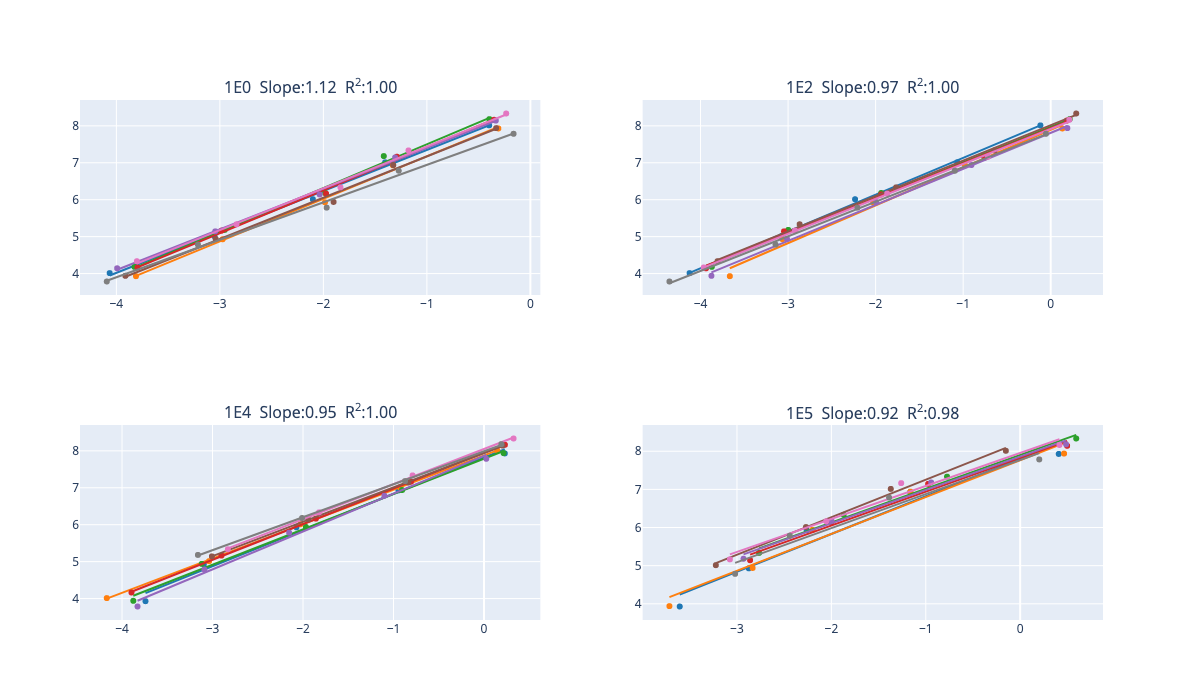

In [37]:
fig = plotly.subplots.make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        f"1E0  Slope:{slope_a:0.2f}  R<sup>2</sup>:{rsq_a:0.2f}",
        f"1E2  Slope:{slope_b:0.2f}  R<sup>2</sup>:{rsq_b:0.2f}",
        f"1E4  Slope:{slope_c:0.2f}  R<sup>2</sup>:{rsq_c:0.2f}",
        f"1E5  Slope:{slope_d:0.2f}  R<sup>2</sup>:{rsq_d:0.2f}"
    )
)
for trace_a, trace_b, trace_c, trace_d in zip(a_traces, b_traces, c_traces, d_traces):
    fig.add_trace(trace_a, row=1, col=1)
    fig.add_trace(trace_b, row=1, col=2)
    fig.add_trace(trace_c, row=2, col=1)
    fig.add_trace(trace_d, row=2, col=2)
fig.update_layout(height=700, width=1000, showlegend=False)
fig.show()

## Linear models

### All cell concentrations, all organisms

In [38]:
reads_ls = []
conc_ls = []
for count_dict in [count_dict_a, count_dict_b, count_dict_c, count_dict_d]:
    reads_org = []
    conc_org = []
    for org in count_dict:
        reads_org.extend(count_dict[org]['reads_norm_log'])
        conc_org.extend(count_dict[org]['conc_nonzero'])
    reads_ls.extend(reads_org)
    conc_ls.extend(conc_org)

In [39]:
slope_all, int_all, rval_all, pval_all, stderr_all = linregress(reads_ls, conc_ls)

#### Linear model fit

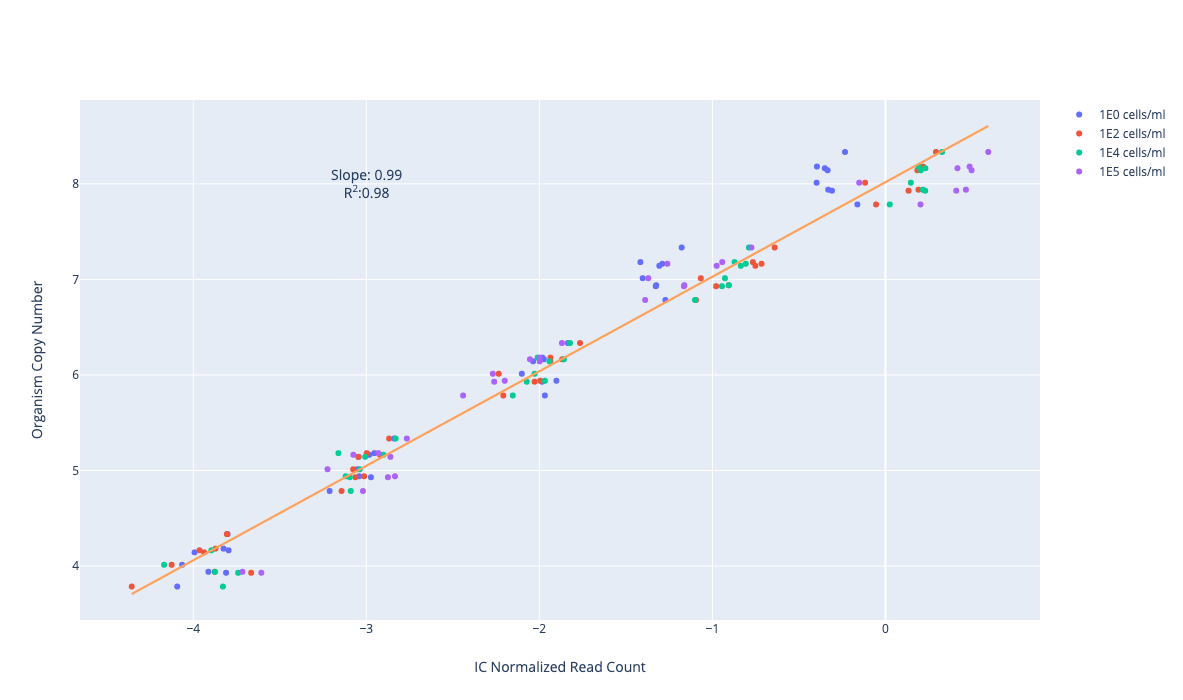

In [40]:
data = []
for name, count_dict in zip(['1E0', '1E2', '1E4', '1E5'], [count_dict_a, count_dict_b, count_dict_c, count_dict_d]):
    trace = go.Scatter(
        x=list(itertools.chain.from_iterable([count_dict[key]['reads_norm_log'].tolist() for key in count_dict])),
        y=list(itertools.chain.from_iterable([count_dict[key]['conc_nonzero'].tolist() for key in count_dict])),
        mode='markers',
        name=name+" cells/ml"
    )
    data.append(trace)
data.append(
    go.Scatter(
        x=reads_ls,
        y=slope_all*np.array(reads_ls)+int_all,
        mode='lines', 
        showlegend=False
    )
)
layout = go.Layout(
    height=700,
    width=900,
    xaxis=dict(
        title='IC Normalized Read Count'
    ),
    yaxis=dict(
        title='Organism Copy Number'
    ),
    annotations=[dict(
        x=-3,
        y=8,
        text=f"Slope: {slope_all:0.2f}<br>R<sup>2</sup>:{rval_all**2:0.2f}",
        font=dict(
            size=14
        ),
        showarrow=False
    )]
)
fig = go.Figure(data, layout)
fig.show()

#### Absolute deviation

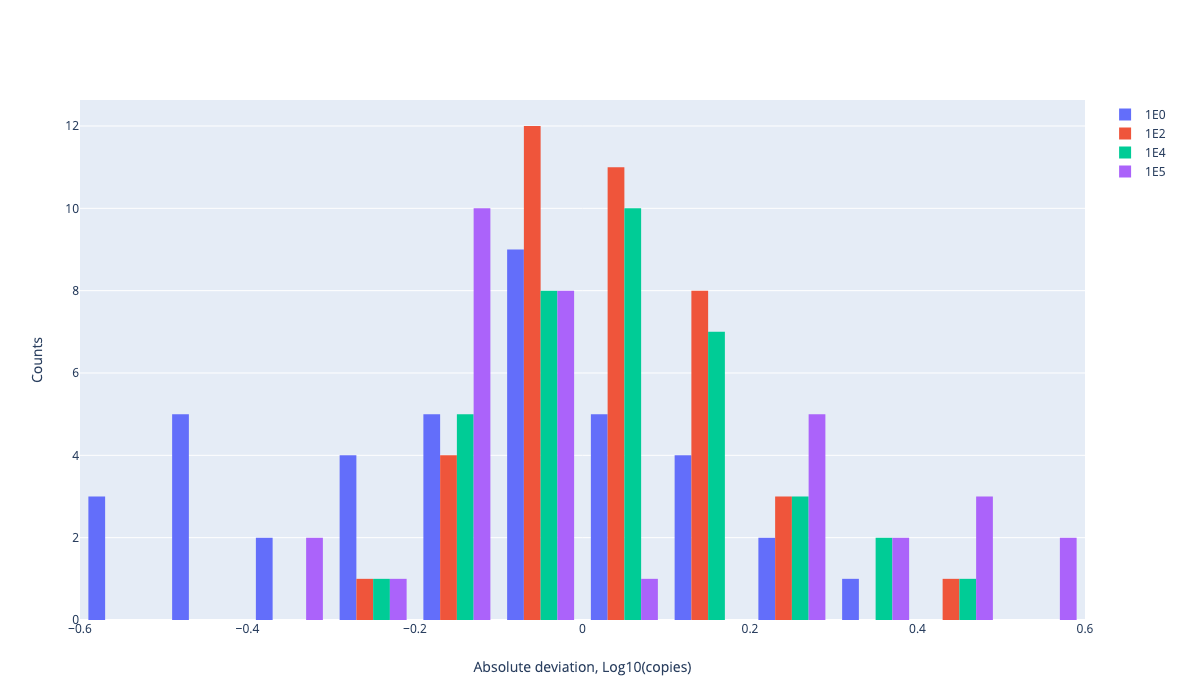

In [41]:
data = []
for name, count_dict in zip(['1E0', '1E2', '1E4', '1E5'], [count_dict_a, count_dict_b, count_dict_c, count_dict_d]):
    x = np.array(list(itertools.chain.from_iterable([count_dict[key]['reads_norm_log'].tolist() for key in count_dict])))
    y = np.array(list(itertools.chain.from_iterable([count_dict[key]['conc_nonzero'].tolist() for key in count_dict])))
    y_pred = slope_all * np.array(x) + int_all
    y_diff = y_pred - y
    trace = go.Histogram(
        x=y_diff,
        name=name
    )
    data.append(trace)
layout = go.Layout(
    height=700,
    width=900,
    xaxis=dict(
        title='Absolute deviation, Log10(copies)'
    ),
    yaxis=dict(
        title='Counts'
    ),
)
fig = go.Figure(data, layout)
fig.show()